In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
amazon = pd.read_csv("Amazon_Stock_Data.csv")

In [2]:
amazon.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,15.425999641418457,15.425999641418457,15.737500190734863,15.347999572753906,15.628999710083008,55664000
3,2015-01-05,15.10949993133545,15.10949993133545,15.418999671936035,15.042499542236328,15.350500106811523,55484000
4,2015-01-06,14.76449966430664,14.76449966430664,15.149999618530273,14.619000434875488,15.112000465393066,70380000


In [3]:
amazon.rename(columns={
    'Date': 'Fecha',
    'Adj Close': 'Cierre Ajustado',
    'Close': 'Cierre',
    'High': 'Máximo',
    'Low': 'Mínimo',
    'Open': 'Apertura',
    'Volume': 'Volumen'
}, inplace=True)


In [4]:
amazon = amazon.drop(index=[0, 1]).reset_index(drop=True)

In [5]:
amazon.columns = ['Fecha', 'Cierre Ajustado', 'Cierre', 'Máximo', 'Mínimo', 'Apertura', 'Volumen']


In [17]:
amazon['Fecha'] = pd.to_datetime(amazon['Fecha'])
numeric_columns = ['Cierre Ajustado', 'Cierre', 'Máximo', 'Mínimo', 'Apertura', 'Volumen']
amazon[numeric_columns] = amazon[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [7]:
amazon.info(), amazon.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Fecha            2501 non-null   object        
 1   Cierre Ajustado  2501 non-null   float64       
 2   Cierre           2501 non-null   float64       
 3   Máximo           2501 non-null   float64       
 4   Mínimo           2501 non-null   float64       
 5   Apertura         2501 non-null   float64       
 6   Volumen          2501 non-null   int64         
 7   Date             2501 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 156.4+ KB


(None,
         Fecha  Cierre Ajustado   Cierre   Máximo   Mínimo  Apertura   Volumen  \
 0  2015-01-02          15.4260  15.4260  15.7375  15.3480   15.6290  55664000   
 1  2015-01-05          15.1095  15.1095  15.4190  15.0425   15.3505  55484000   
 2  2015-01-06          14.7645  14.7645  15.1500  14.6190   15.1120  70380000   
 3  2015-01-07          14.9210  14.9210  15.0640  14.7665   14.8750  52806000   
 4  2015-01-08          15.0230  15.0230  15.1570  14.8055   15.0160  61768000   
 
         Date  
 0 2015-01-02  
 1 2015-01-05  
 2 2015-01-06  
 3 2015-01-07  
 4 2015-01-08  )

In [8]:
amazon.describe()


,Cierre Ajustado,Cierre,Máximo,Mínimo,Apertura,Volumen,Date
count,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2.501000e+03,2501
mean,100.484731,100.484731,101.649652,99.262112,100.505960,7.639864e+07,2019-12-20 21:48:08.924430336
min,14.347500,14.347500,14.539500,14.262500,14.314000,1.762600e+07,2015-01-02 00:00:00
25%,48.314999,48.314999,48.740501,48.015999,48.450001,5.094190e+07,2017-06-27 00:00:00
50%,94.315002,94.315002,95.347000,93.207497,94.290001,6.538400e+07,2019-12-19 00:00:00
75%,153.339996,153.339996,155.076996,151.029999,153.529999,9.030000e+07,2022-06-14 00:00:00
max,227.029999,227.029999,230.080002,225.669998,227.210007,4.771220e+08,2024-12-09 00:00:00
std,53.463575,53.463575,54.103002,52.818208,53.484189,4.058876e+07,NaN


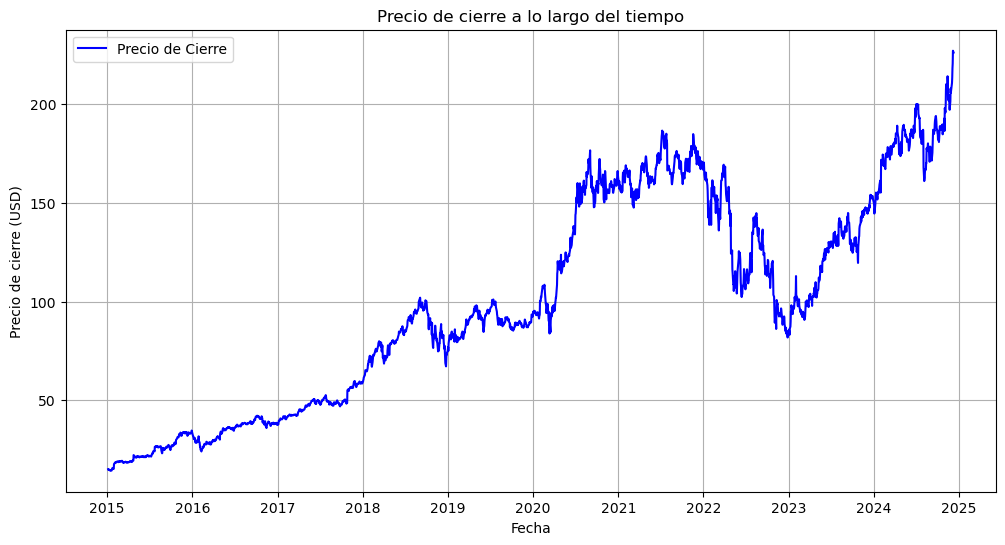

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(amazon['Fecha'], amazon['Cierre'], label='Precio de Cierre', color='blue')
plt.title('Precio de cierre a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (USD)')
plt.legend()
plt.grid()
plt.show()

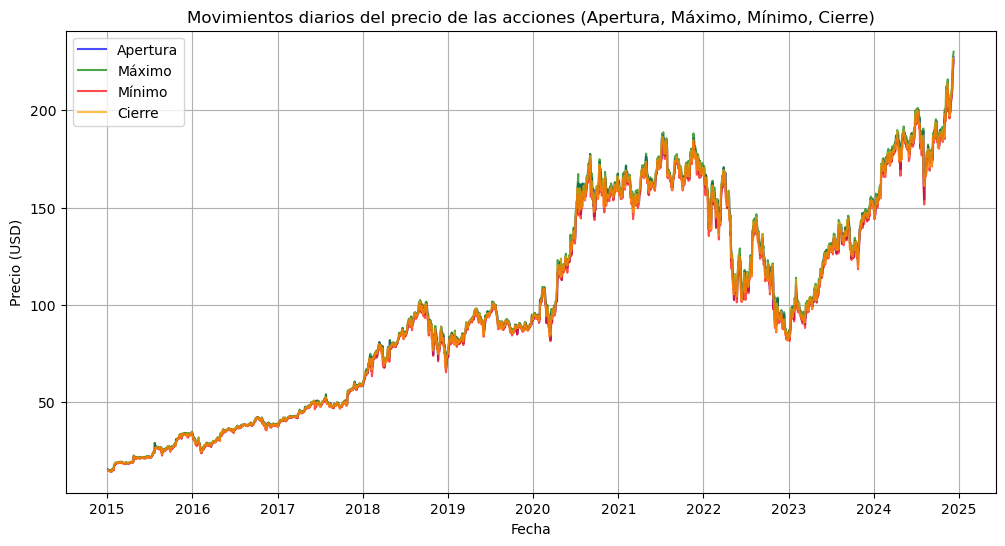

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(amazon['Fecha'], amazon['Apertura'], label='Apertura', color='blue', alpha=0.7)
plt.plot(amazon['Fecha'], amazon['Máximo'], label='Máximo', color='green', alpha=0.7)
plt.plot(amazon['Fecha'], amazon['Mínimo'], label='Mínimo', color='red', alpha=0.7)
plt.plot(amazon['Fecha'], amazon['Cierre'], label='Cierre', color='orange', alpha=0.7)
plt.title('Movimientos diarios del precio de las acciones (Apertura, Máximo, Mínimo, Cierre)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid()
plt.show()

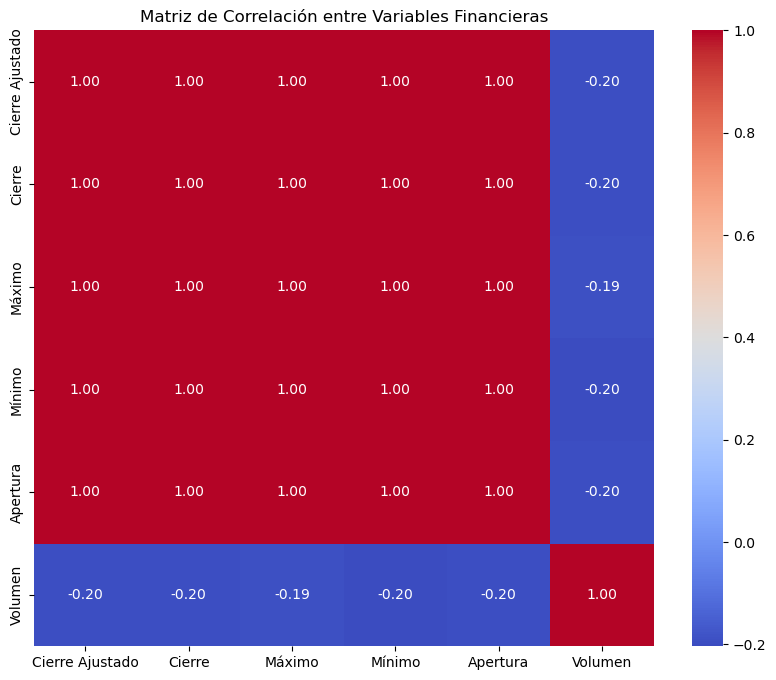

In [21]:
Matrix_de_Correlación= amazon[['Cierre Ajustado', 'Cierre', 'Máximo', 'Mínimo', 'Apertura', 'Volumen']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(Matrix_de_Correlación, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Financieras')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [13]:
amazon.loc[:, 'Lag_1'] = amazon['Cierre'].shift(1)
amazon = amazon.dropna()
X = amazon[['Lag_1']] 
y = amazon['Cierre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
lr_modelo = LinearRegression()
lr_modelo.fit(X_train, y_train)

y_pred = lr_modelo.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"R-Cuadrado: {r2}")

Error cuadrático medio: 5.602917288915336
R-Cuadrado: 0.9979792938721983


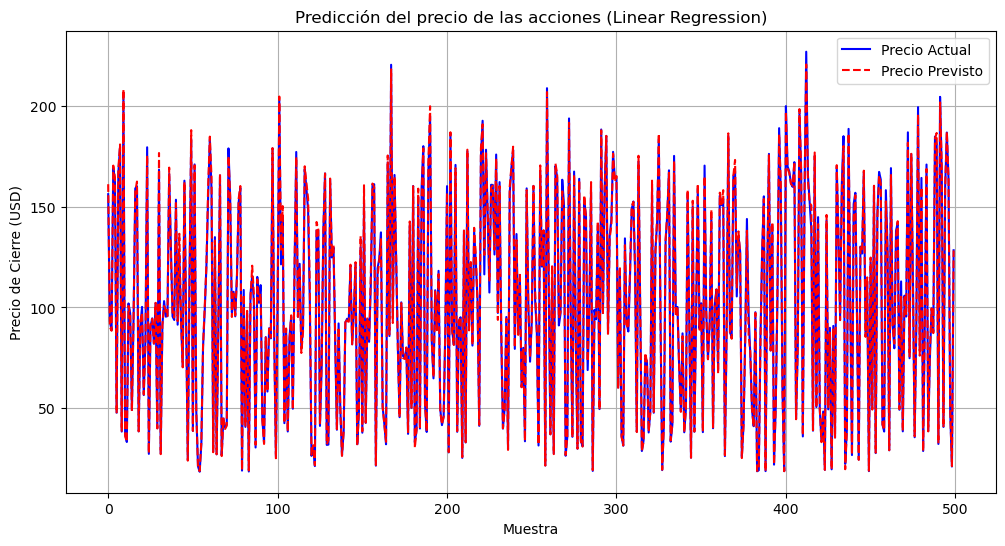

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Precio Actual', color='blue')
plt.plot(y_pred, label='Precio Previsto', color='red', linestyle='dashed')
plt.title('Predicción del precio de las acciones (Linear Regression)')
plt.xlabel('Muestra')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.grid()
plt.show()